In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

In [20]:
data = pd.read_csv('energy_dataset.csv/energy_dataset.csv')
data.head()

,time,generation biomass,generation fossil brown coal/lignite,generation fossil coal-derived gas,generation fossil gas,generation fossil hard coal,generation fossil oil,generation fossil oil shale,generation fossil peat,generation geothermal,...,generation waste,generation wind offshore,generation wind onshore,forecast solar day ahead,forecast wind offshore eday ahead,forecast wind onshore day ahead,total load forecast,total load actual,price day ahead,price actual
0,2015-01-01 00:00:00+01:00,447.0,329.0,0.0,4844.0,4821.0,162.0,0.0,0.0,0.0,...,196.0,0.0,6378.0,17.0,NaN,6436.0,26118.0,25385.0,50.10,65.41
1,2015-01-01 01:00:00+01:00,449.0,328.0,0.0,5196.0,4755.0,158.0,0.0,0.0,0.0,...,195.0,0.0,5890.0,16.0,NaN,5856.0,24934.0,24382.0,48.10,64.92
2,2015-01-01 02:00:00+01:00,448.0,323.0,0.0,4857.0,4581.0,157.0,0.0,0.0,0.0,...,196.0,0.0,5461.0,8.0,NaN,5454.0,23515.0,22734.0,47.33,64.48
3,2015-01-01 03:00:00+01:00,438.0,254.0,0.0,4314.0,4131.0,160.0,0.0,0.0,0.0,...,191.0,0.0,5238.0,2.0,NaN,5151.0,22642.0,21286.0,42.27,59.32
4,2015-01-01 04:00:00+01:00,428.0,187.0,0.0,4130.0,3840.0,156.0,0.0,0.0,0.0,...,189.0,0.0,4935.0,9.0,NaN,4861.0,21785.0,20264.0,38.41,56.04


In [21]:
data.time = pd.to_datetime(data.time, utc = True, infer_datetime_format= True)
data = data.set_index('time')
data.head()

,generation biomass,generation fossil brown coal/lignite,generation fossil coal-derived gas,generation fossil gas,generation fossil hard coal,generation fossil oil,generation fossil oil shale,generation fossil peat,generation geothermal,generation hydro pumped storage aggregated,...,generation waste,generation wind offshore,generation wind onshore,forecast solar day ahead,forecast wind offshore eday ahead,forecast wind onshore day ahead,total load forecast,total load actual,price day ahead,price actual
time,,,,,,,,,,,,,,,,,,,,,
2014-12-31 23:00:00+00:00,447.0,329.0,0.0,4844.0,4821.0,162.0,0.0,0.0,0.0,NaN,...,196.0,0.0,6378.0,17.0,NaN,6436.0,26118.0,25385.0,50.10,65.41
2015-01-01 00:00:00+00:00,449.0,328.0,0.0,5196.0,4755.0,158.0,0.0,0.0,0.0,NaN,...,195.0,0.0,5890.0,16.0,NaN,5856.0,24934.0,24382.0,48.10,64.92
2015-01-01 01:00:00+00:00,448.0,323.0,0.0,4857.0,4581.0,157.0,0.0,0.0,0.0,NaN,...,196.0,0.0,5461.0,8.0,NaN,5454.0,23515.0,22734.0,47.33,64.48
2015-01-01 02:00:00+00:00,438.0,254.0,0.0,4314.0,4131.0,160.0,0.0,0.0,0.0,NaN,...,191.0,0.0,5238.0,2.0,NaN,5151.0,22642.0,21286.0,42.27,59.32
2015-01-01 03:00:00+00:00,428.0,187.0,0.0,4130.0,3840.0,156.0,0.0,0.0,0.0,NaN,...,189.0,0.0,4935.0,9.0,NaN,4861.0,21785.0,20264.0,38.41,56.04


In [22]:
data.isnull().sum()

generation biomass                                19
generation fossil brown coal/lignite              18
generation fossil coal-derived gas                18
generation fossil gas                             18
generation fossil hard coal                       18
generation fossil oil                             19
generation fossil oil shale                       18
generation fossil peat                            18
generation geothermal                             18
generation hydro pumped storage aggregated     35064
generation hydro pumped storage consumption       19
generation hydro run-of-river and poundage        19
generation hydro water reservoir                  18
generation marine                                 19
generation nuclear                                17
generation other                                  18
generation other renewable                        18
generation solar                                  18
generation waste                              

In [23]:
# Dataframe'in tüm sütunlarındaki sıfır sayısını sayın
for column_name in data.columns:
    column = data[column_name]
    
    count = (column == 0).sum()
    print(f"{column_name:{43}} : {count}")

generation biomass                          : 4
generation fossil brown coal/lignite        : 10517
generation fossil coal-derived gas          : 35046
generation fossil gas                       : 1
generation fossil hard coal                 : 3
generation fossil oil                       : 3
generation fossil oil shale                 : 35046
generation fossil peat                      : 35046
generation geothermal                       : 35046
generation hydro pumped storage aggregated  : 0
generation hydro pumped storage consumption : 12607
generation hydro run-of-river and poundage  : 3
generation hydro water reservoir            : 3
generation marine                           : 35045
generation nuclear                          : 3
generation other                            : 4
generation other renewable                  : 3
generation solar                            : 3
generation waste                            : 3
generation wind offshore                    : 35046
generati

In [24]:
data.drop(['generation hydro pumped storage aggregated', 'forecast wind offshore eday ahead',
           'generation wind offshore', 'generation fossil coal-derived gas',
           'generation fossil oil shale', 'generation fossil peat', 'generation marine',
           'generation wind offshore', 'generation geothermal'], inplace = True, axis = 1)

In [18]:
data.isnull().sum()

generation biomass                             19
generation fossil brown coal/lignite           18
generation fossil gas                          18
generation fossil hard coal                    18
generation fossil oil                          19
generation hydro pumped storage consumption    19
generation hydro run-of-river and poundage     19
generation hydro water reservoir               18
generation nuclear                             17
generation other                               18
generation other renewable                     18
generation solar                               18
generation waste                               19
generation wind onshore                        18
forecast solar day ahead                        0
forecast wind onshore day ahead                 0
total load forecast                             0
total load actual                              36
price day ahead                                 0
price actual                                    0


In [25]:
plt.rcParams['figure.figsize'] = (15, 5)

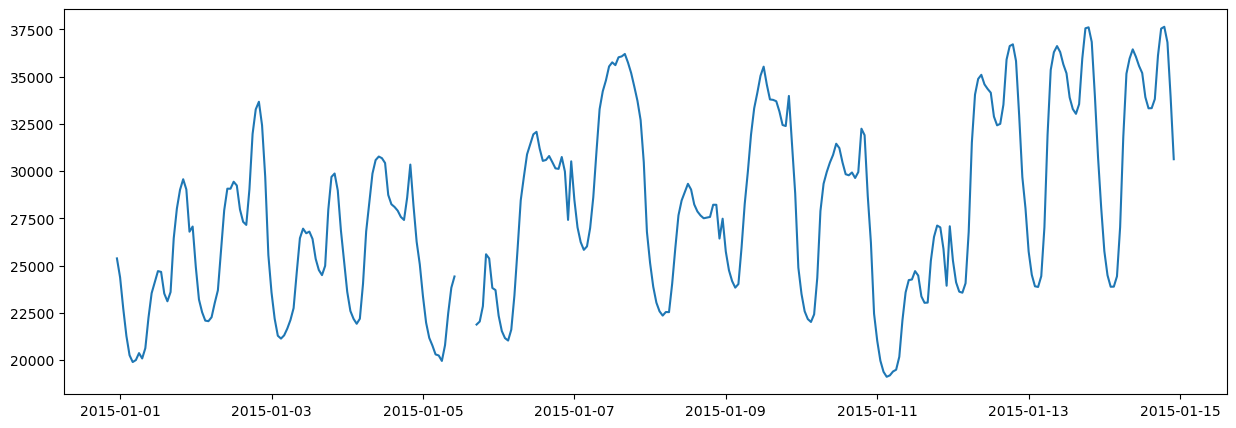

In [26]:
plt.plot(data['total load actual'][:24*7*2])

In [28]:
# Veri kümesindeki eksik değerleri olmadan yapılan interpolate
data.interpolate(method='linear', limit_direction='forward', inplace=True, axis=0)

In [29]:
data.isnull().sum()

generation biomass                             0
generation fossil brown coal/lignite           0
generation fossil gas                          0
generation fossil hard coal                    0
generation fossil oil                          0
generation hydro pumped storage consumption    0
generation hydro run-of-river and poundage     0
generation hydro water reservoir               0
generation nuclear                             0
generation other                               0
generation other renewable                     0
generation solar                               0
generation waste                               0
generation wind onshore                        0
forecast solar day ahead                       0
forecast wind onshore day ahead                0
total load forecast                            0
total load actual                              0
price day ahead                                0
price actual                                   0
dtype: int64

In [32]:
#Toplam üretim için yeni bir sütun oluşturmak
data['total generation'] = data['generation biomass'] + data['generation fossil brown coal/lignite'] + data['generation fossil gas'] + data['generation fossil hard coal'] + data['generation fossil oil'] + data['generation hydro pumped storage consumption'] + data['generation hydro run-of-river and poundage'] + data['generation hydro water reservoir'] + data['generation nuclear'] + data['generation other'] + data['generation other renewable'] + data['generation solar'] + data['generation waste'] + data['generation wind onshore']

In [33]:
data.head()

,generation biomass,generation fossil brown coal/lignite,generation fossil gas,generation fossil hard coal,generation fossil oil,generation hydro pumped storage consumption,generation hydro run-of-river and poundage,generation hydro water reservoir,generation nuclear,generation other,...,generation solar,generation waste,generation wind onshore,forecast solar day ahead,forecast wind onshore day ahead,total load forecast,total load actual,price day ahead,price actual,total generation
time,,,,,,,,,,,,,,,,,,,,,
2014-12-31 23:00:00+00:00,447.0,329.0,4844.0,4821.0,162.0,863.0,1051.0,1899.0,7096.0,43.0,...,49.0,196.0,6378.0,17.0,6436.0,26118.0,25385.0,50.10,65.41,28251.0
2015-01-01 00:00:00+00:00,449.0,328.0,5196.0,4755.0,158.0,920.0,1009.0,1658.0,7096.0,43.0,...,50.0,195.0,5890.0,16.0,5856.0,24934.0,24382.0,48.10,64.92,27818.0
2015-01-01 01:00:00+00:00,448.0,323.0,4857.0,4581.0,157.0,1164.0,973.0,1371.0,7099.0,43.0,...,50.0,196.0,5461.0,8.0,5454.0,23515.0,22734.0,47.33,64.48,26796.0
2015-01-01 02:00:00+00:00,438.0,254.0,4314.0,4131.0,160.0,1503.0,949.0,779.0,7098.0,43.0,...,50.0,191.0,5238.0,2.0,5151.0,22642.0,21286.0,42.27,59.32,25223.0
2015-01-01 03:00:00+00:00,428.0,187.0,4130.0,3840.0,156.0,1826.0,953.0,720.0,7097.0,43.0,...,42.0,189.0,4935.0,9.0,4861.0,21785.0,20264.0,38.41,56.04,24620.0


# Data Visualization

<AxesSubplot:ylabel='Density'>

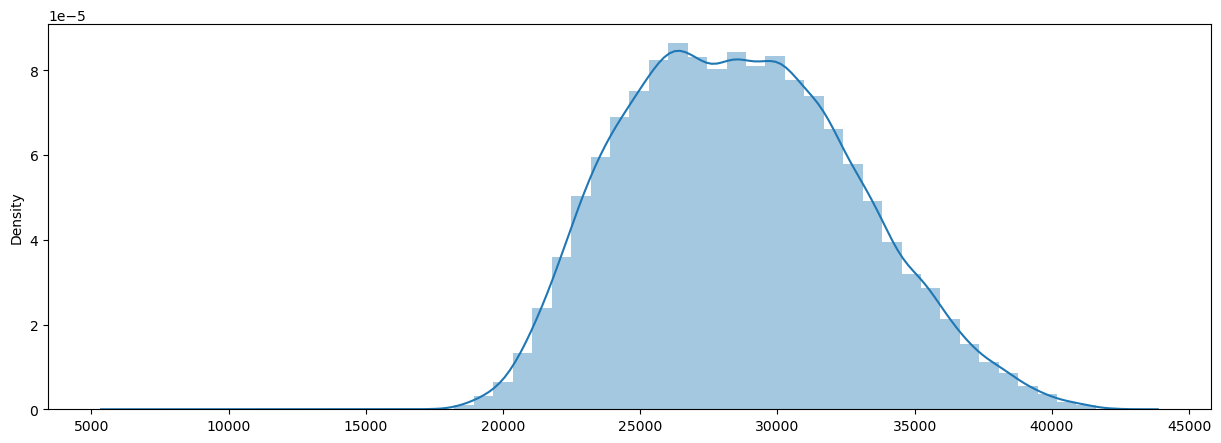

In [34]:
sns.distplot(x= data['total generation'], kde = True)

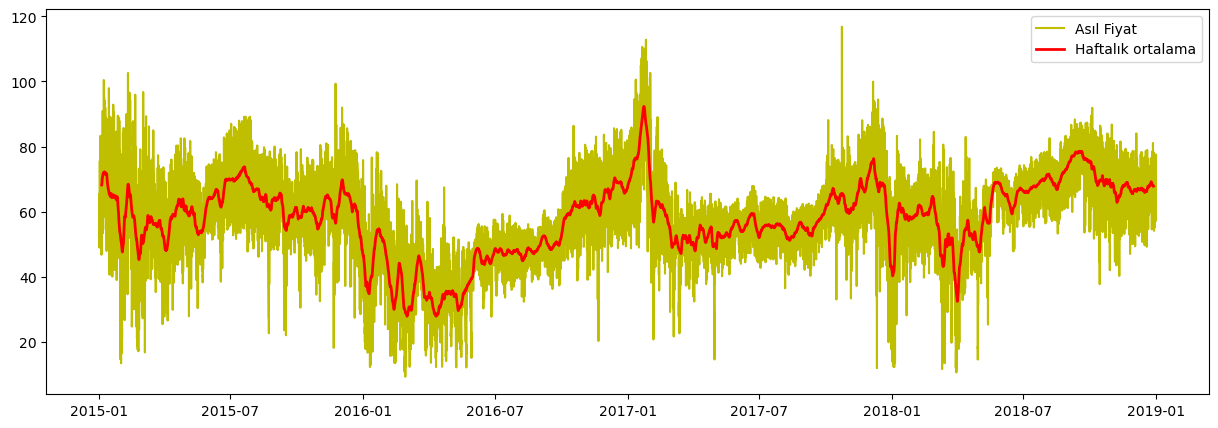

In [37]:
#Gerçek saatlik elektrik fiyatını ve bir hafta boyunca hareketli ortalamasını çizme
fig, ax = plt.subplots(1,1)
rolling = data['price actual'].rolling(24*7, center = True).mean()
ax.plot(data['price actual'], color = 'y', label='Asıl Fiyat')
ax.plot(rolling, color = 'red', linestyle='-', linewidth=2, label='Haftalık ortalama')
plt.legend()
plt.show()

[]

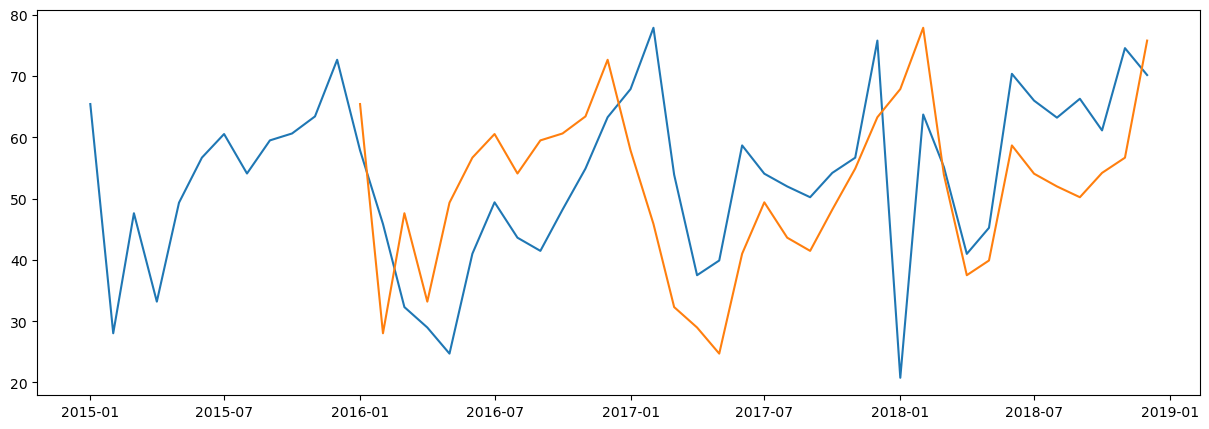

In [42]:
# Elektrik fiyatını (ay bazında) çizin
monthly_price = data['price actual'].asfreq('m')
lagged = monthly_price.shift(12)

fig, ax = plt.subplots(1,1)
ax.plot(monthly_price, label = 'Aylık Ücret')
ax.plot(lagged, label ='1 y')
plt.plot()

İki grafikte benzer şekilde artışlar yaşamıştır

<AxesSubplot:ylabel='Density'>

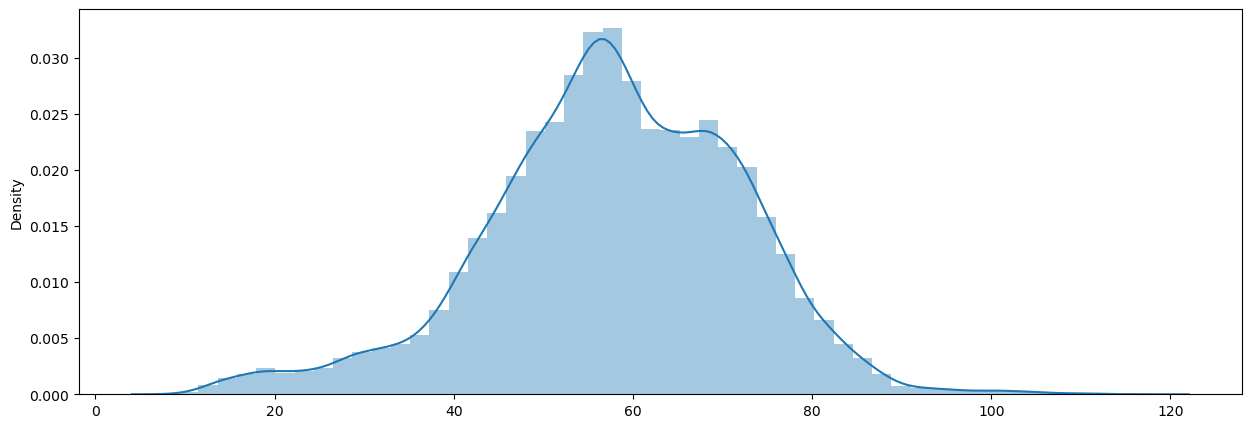

In [43]:
sns.distplot(x = data['price actual'], kde = True)

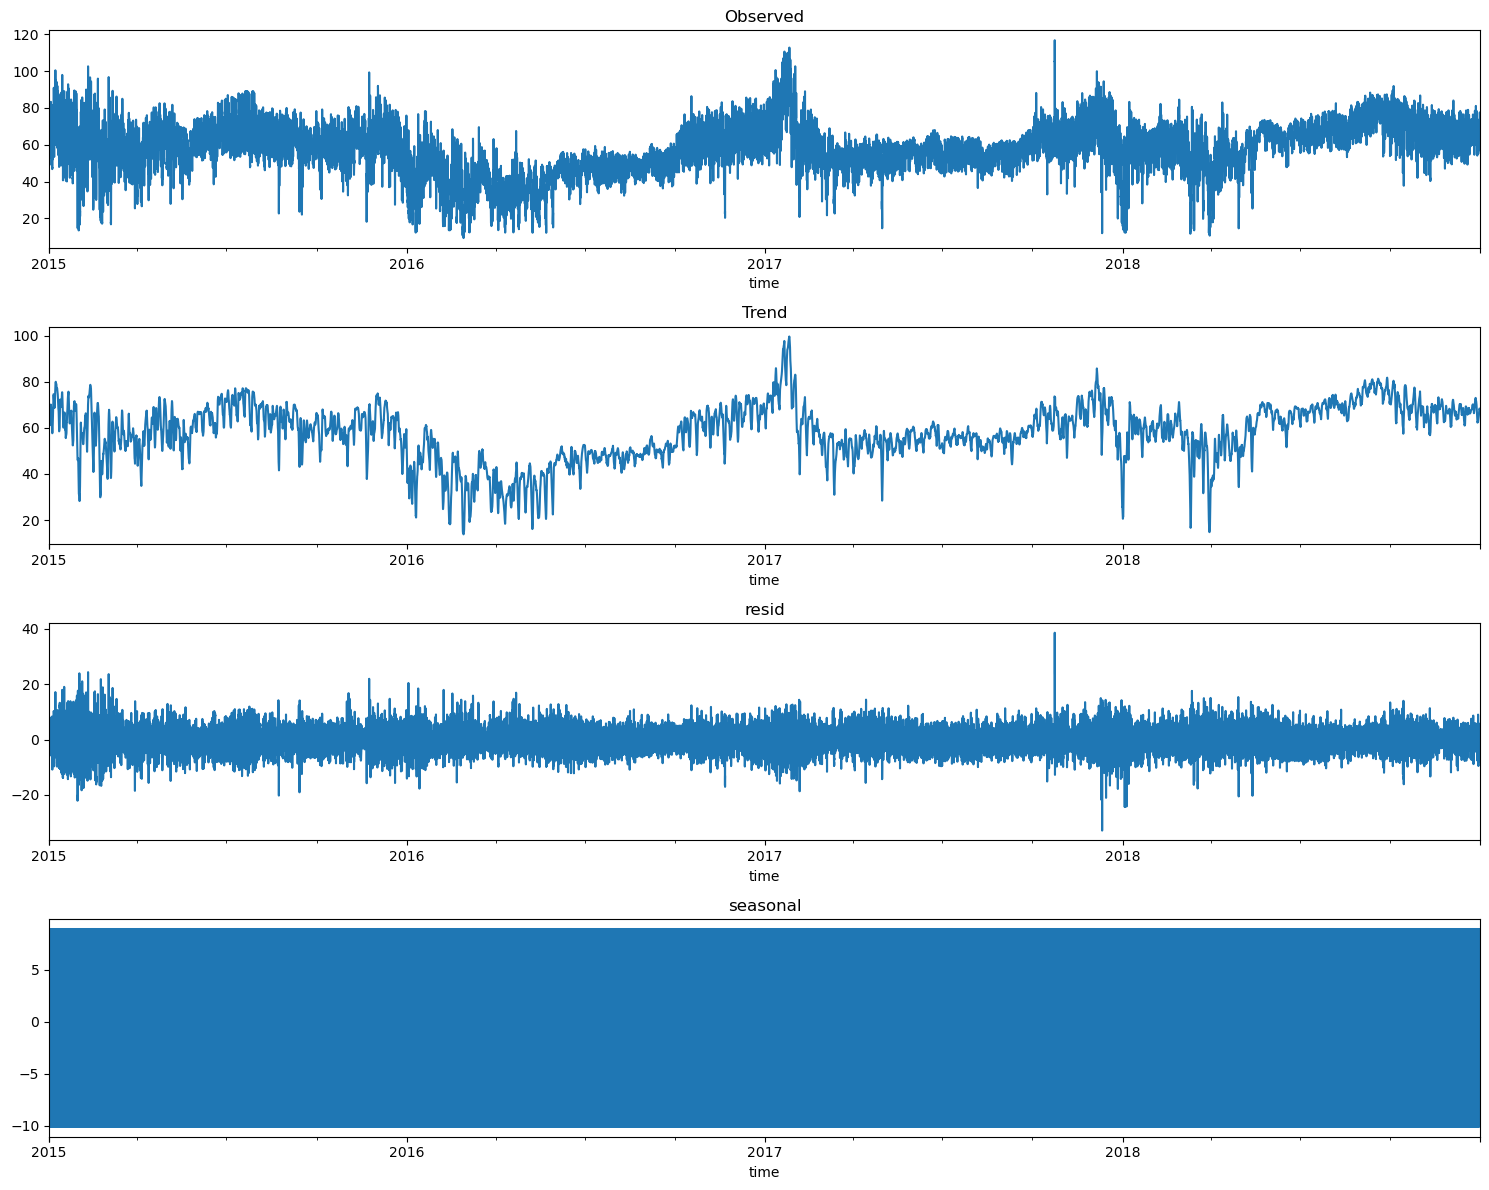

In [44]:
import statsmodels.api as sm
res = sm.tsa.seasonal_decompose(data['price actual'], model = 'additive')
fig, (ax1,ax2,ax3,ax4) = plt.subplots(4,1, figsize = (15,12))
res.observed.plot(ax=ax1, title= 'Observed')
res.trend.plot(ax=ax2, title = 'Trend')
res.resid.plot(ax=ax3, title = 'resid')
res.seasonal.plot(ax= ax4, title = 'seasonal')
plt.tight_layout()
plt.show()

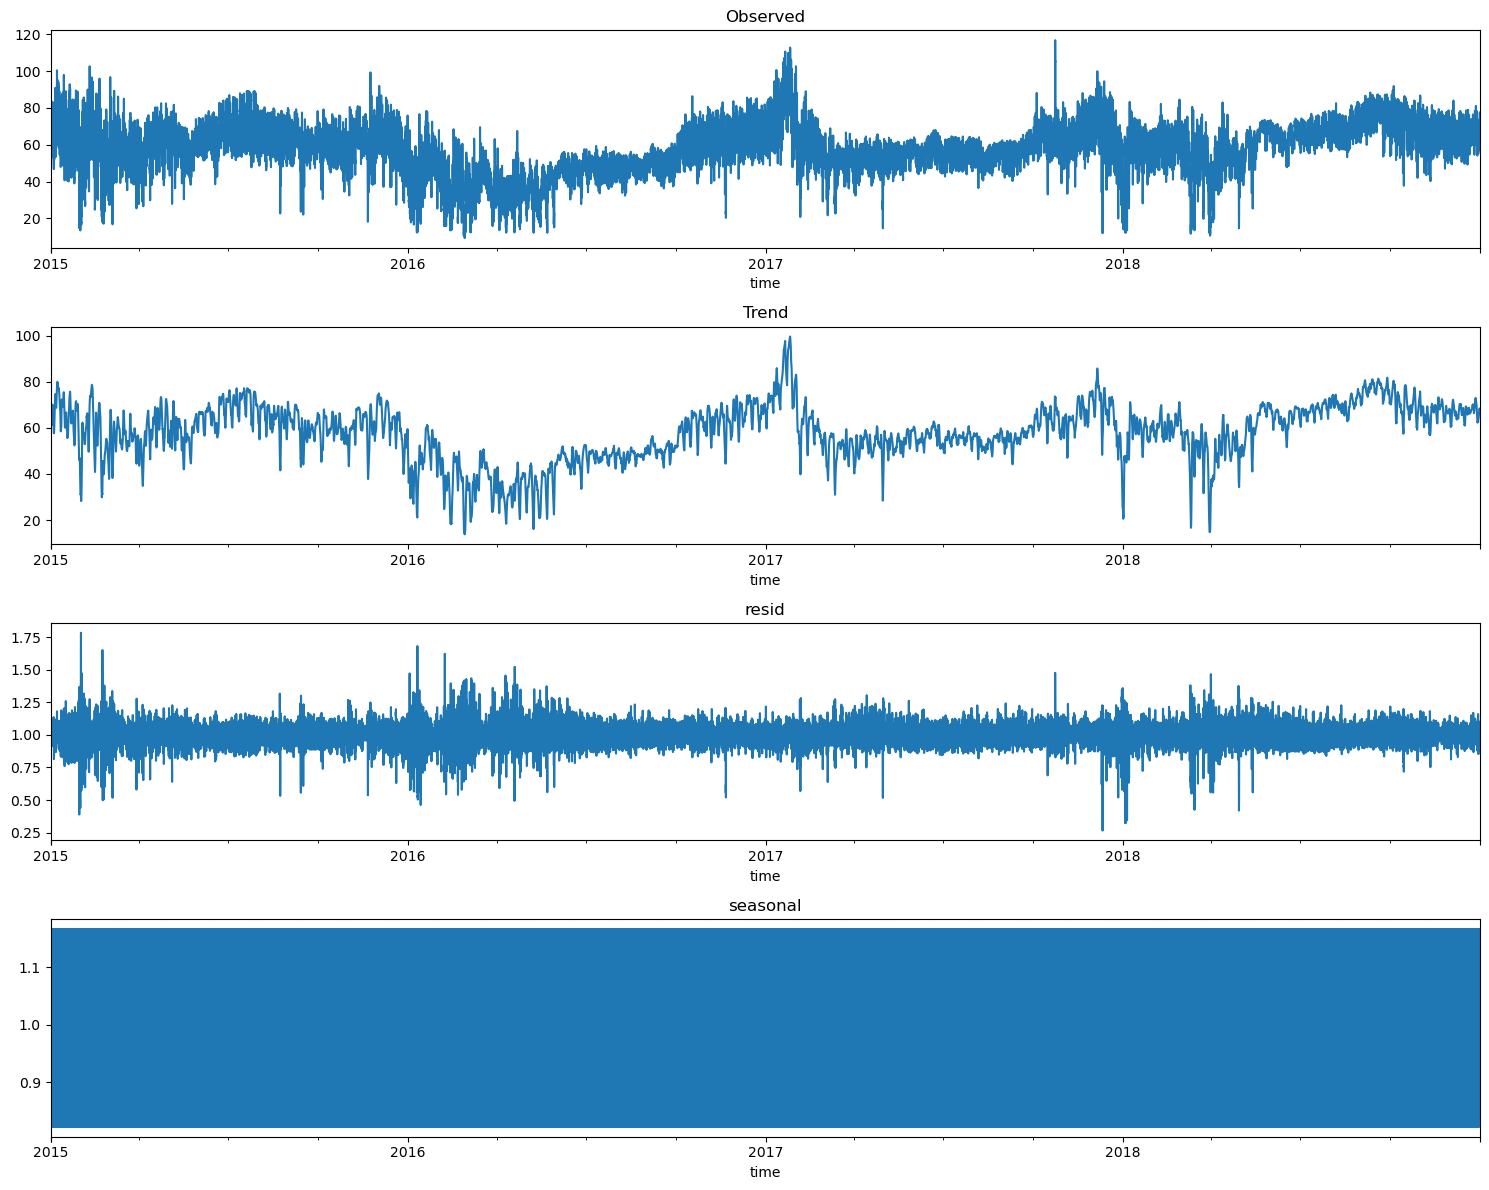

In [45]:
res = sm.tsa.seasonal_decompose(data['price actual'], model = 'multiplicative')
fig, (ax1,ax2,ax3,ax4) = plt.subplots(4,1, figsize = (15,12))
res.observed.plot(ax=ax1, title= 'Observed')
res.trend.plot(ax=ax2, title = 'Trend')
res.resid.plot(ax=ax3, title = 'resid')
res.seasonal.plot(ax= ax4, title = 'seasonal')
plt.tight_layout()
plt.show()

In [46]:
def prepare_dataset(data, size):
  x_data = []
  y_data = []

  l = len(data) - size

  for i in range(l):
    x = data[i:i+size]
    y = data[i+size]
    x_data.append(x)
    y_data.append(y)

  return np.array(x_data), np.array(y_data)

In [47]:
def plot_model_rmse_and_loss(history, title):
    
    # Evaluate train and validation accuracies and losses
    
    train_rmse = history.history['root_mean_squared_error']
    val_rmse = history.history['val_root_mean_squared_error']
    
    train_loss = history.history['loss']
    val_loss = history.history['val_loss']
    
    # Visualize epochs vs. train and validation accuracies and losses
    
    plt.figure(figsize=(15, 5))

    plt.subplot(1, 2, 1)
    plt.plot(train_rmse, label='Training RMSE')
    plt.plot(val_rmse, label='Validation RMSE')
    plt.legend()
    plt.title('Epochs vs. Training and Validation RMSE')
    
    plt.subplot(1, 2, 2)
    plt.plot(train_loss, label='Training Loss')
    plt.plot(val_loss, label='Validation Loss')
    plt.legend()
    plt.title('Epochs vs. Training and Validation Loss')

    plt.suptitle(title, fontweight = 'bold',  fontsize= 15)
    
    plt.show()

In [48]:
from sklearn.preprocessing import MinMaxScaler

data_filtered = data['price actual'].values

scaler = MinMaxScaler(feature_range = (0,1))

scaled_data = scaler.fit_transform(data_filtered.reshape(-1,1))
scaled_data.shape

(35064, 1)

In [49]:
train_size = int(np.ceil(len(scaled_data) * 0.8))
test_size = int((len(scaled_data) - train_size) *0.5)
print(train_size, test_size)

28052 3506


In [50]:
#verileri ayrıştır
xtrain, ytrain = prepare_dataset(scaled_data[:train_size], 25)
xval, yval = prepare_dataset(scaled_data[train_size-25:train_size +test_size], 25)
xtest, ytest = prepare_dataset(scaled_data[train_size + test_size-25:], 25)

In [51]:
print(xtrain.shape)
print(xval.shape)
print(xtest.shape)

(28027, 25, 1)
(3506, 25, 1)
(3506, 25, 1)


In [55]:
!pip install tensorflow

Defaulting to user installation because normal site-packages is not writeable


In [56]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout, Conv1D, Flatten, SimpleRNN

In [57]:
loss = tf.keras.losses.MeanSquaredError()
metric = [tf.keras.metrics.RootMeanSquaredError()]
optimizer = tf.keras.optimizers.Adam()
early_stopping = [tf.keras.callbacks.EarlyStopping(monitor = 'loss', patience = 5)]

#EVRİŞİMLİ SİNİR AĞI EĞİTİMİ

In [58]:
model_CNN = Sequential()
model_CNN.add(Conv1D(filters = 48, kernel_size =2, padding = 'causal', activation = 'relu', input_shape = (xtrain.shape[1], 1)))
model_CNN.add(Flatten())
model_CNN.add(Dense(48, activation = 'relu'))
model_CNN.add(Dropout(0.2))
model_CNN.add(Dense(1))
model_CNN.compile(loss = loss, metrics = metric, optimizer = optimizer)
history = model_CNN.fit(xtrain, ytrain, epochs = 120, validation_data =(xval , yval), callbacks = early_stopping)

Epoch 1/120
876/876 [==============================] - 2s 1ms/step - loss: 0.0044 - root_mean_squared_error: 0.0664 - val_loss: 4.6287e-04 - val_root_mean_squared_error: 0.0215
Epoch 2/120
876/876 [==============================] - 1s 1ms/step - loss: 0.0019 - root_mean_squared_error: 0.0433 - val_loss: 5.3106e-04 - val_root_mean_squared_error: 0.0230
Epoch 3/120
876/876 [==============================] - 1s 1ms/step - loss: 0.0012 - root_mean_squared_error: 0.0350 - val_loss: 4.3886e-04 - val_root_mean_squared_error: 0.0209
Epoch 4/120
876/876 [==============================] - 1s 1ms/step - loss: 0.0010 - root_mean_squared_error: 0.0321 - val_loss: 4.0346e-04 - val_root_mean_squared_error: 0.0201
Epoch 5/120
876/876 [==============================] - 1s 1ms/step - loss: 9.5779e-04 - root_mean_squared_error: 0.0309 - val_loss: 4.7812e-04 - val_root_mean_squared_error: 0.0219
Epoch 6/120
876/876 [==============================] - 1s 1ms/step - loss: 9.4245e-04 - root_mean_squared_error

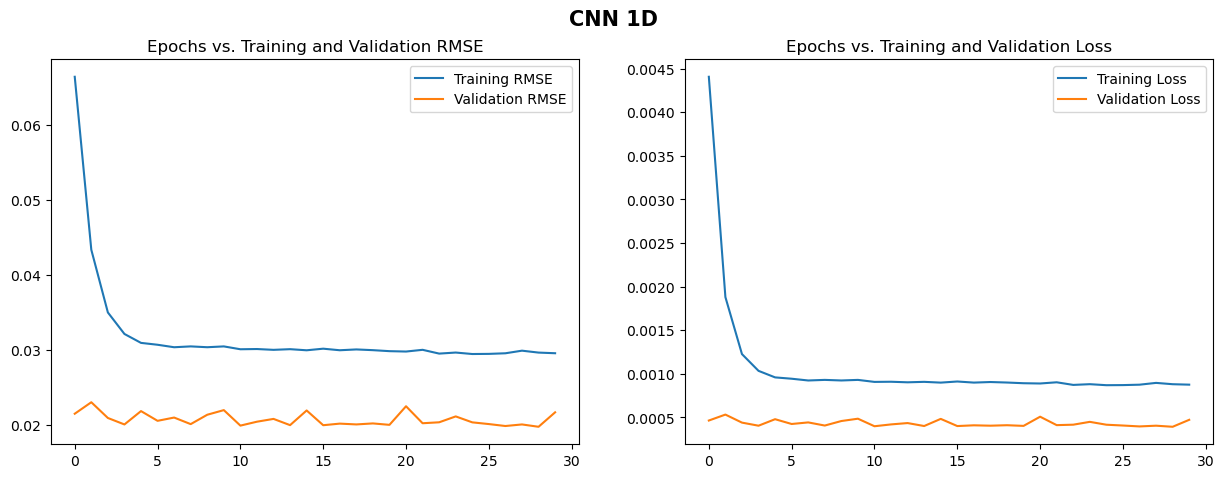

110/110 [==============================] - 0s 700us/step

Root Mean Squarred Error for CNN 1D = 68.50967622222727


In [59]:
plot_model_rmse_and_loss(history,"CNN 1D")
predictions = model_CNN.predict(xtest)
predictions = scaler.inverse_transform(predictions)
CNN_rmse = np.sqrt(np.mean(((predictions - ytest) ** 2)))
print(f"\nRoot Mean Squarred Error for CNN 1D = {CNN_rmse}")

In [61]:
print(f"Root Mean Squarred Error for CNN = {CNN_rmse}")

Root Mean Squarred Error for CNN = 68.50967622222727
